# Building a neural-network with Keras
**Author: Furong Guo**

(Colab is recommended)

First, import prerequisites

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout
from keras.utils import np_utils

In [37]:
%matplotlib inline

In [3]:
(x_train_original, y_train_original), (x_test_original, y_test_original) = fashion_mnist.load_data()
print('the original shape of x_train: ' + str(x_train_original.shape))
print('the original shape of x_test: ' + str(x_test_original.shape))

4423680/4422102 [==============================] - 0s 0us/step
the original shape of x_train: (60000, 28, 28)
the original shape of x_test: (10000, 28, 28)


Let's check what the samples are like.

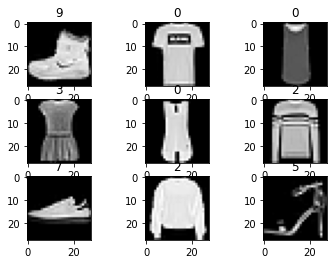

In [4]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train_original[i], cmap = 'gray', interpolation= None)
  plt.title(str(y_train_original[i]))

## Step 1: Format the data for training

For input values

In [5]:
x_train = x_train_original.reshape(60000, 784)
x_test = x_test_original.reshape(10000, 784)
x_train.astype('float32')
x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
print('shape of x_train:' + str(x_train.shape))
print('shape of x_test:' + str(x_test.shape))

shape of x_train:(60000, 784)
shape of x_test:(10000, 784)


For output labels

In [6]:
num_classes = 10
y_train = np_utils.to_categorical(y_train_original, num_classes= num_classes, dtype='float32')
y_test = np_utils.to_categorical(y_test_original, num_classes= num_classes, dtype='float32')

## Step 2: Build the model

In [23]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(10, activation='softmax'))

## Step 3: Compile the model

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Step 4: Train the model

In [25]:
model.fit(x= x_train, y= y_train, batch_size= 128, epochs= 10, verbose= 1, validation_data= (x_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6742 - accuracy: 0.7599 - val_loss: 0.4345 - val_accuracy: 0.8417
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3916 - accuracy: 0.8576 - val_loss: 0.3864 - val_accuracy: 0.8628
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3486 - accuracy: 0.8705 - val_loss: 0.3785 - val_accuracy: 0.8608
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3282 - accuracy: 0.8802 - val_loss: 0.3378 - val_accuracy: 0.8761
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3107 - accuracy: 0.8861 - val_loss: 0.3426 - val_accuracy: 0.8777
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2921 - accuracy: 0.8919 - val_loss: 0.3328 - val_accuracy: 0.8794
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2836 - accuracy: 0.8927 - val_loss: 0.3290 - val_accuracy: 0.8805
Epoch 

## Evaluate the performance

In [26]:
score = model.evaluate(x= x_test, y = y_test, verbose= 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3205917179584503
Test accuracy: 0.8877999782562256


In [45]:
predicted_classes = model.predict_classes(x_test, batch_size=128, verbose=0)
correct_indices = np.nonzero(predicted_classes == y_test_original)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test_original)[0]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


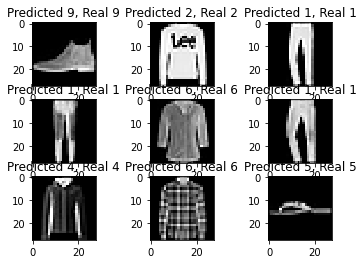

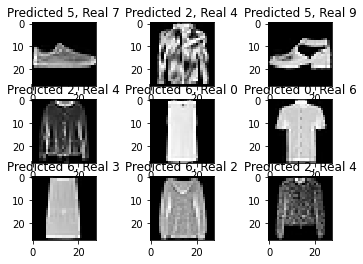

In [48]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test_original[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Real {}".format(predicted_classes[correct], y_test_original[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Real {}".format(predicted_classes[incorrect], y_test_original[incorrect]))

It seems sane.
